In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml("mnist_784")

In [2]:
X, y = mnist["data"], mnist["target"].astype(int)

In [3]:
import matplotlib
import matplotlib.pyplot as plt

def plot_digit(digit):
    plt.imshow(digit, cmap = matplotlib.cm.binary,
              interpolation = "nearest")
    plt.axis("off")

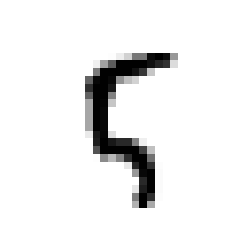

In [4]:
some_digit = X[100]
plot_digit(some_digit.reshape(28,28))
plt.show()

In [5]:
y[100]

5

In [6]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [7]:
import numpy as np
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [ ]:
X_train_shift = X_train
for direction in ["left", "right", "up", "down"]:
    X_train_shift.concatenate(np.array([pixel_shift[image.reshape(28,28), direction].reshape(-1,1) for image in X_train]))

In [ ]:
X_train_shift = X_train
for direction in ["left", "right", "up", "down"]:
    X_train_shift.concatenate(np.array([pixel_shift[image.reshape(28,28), direction].reshape(-1,1) for image in X_train]))

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

param_grid = [
    {'weights': ['uniform', 'distance'],
     'n_neighbors': [3, 4, 5, 6, 7, 8],
    }
]

knn_clf = KNeighborsClassifier()

grid_search = GridSearchCV(knn_clf, param_grid, cv = 3, 
                           scoring = "accuracy")
grid_search.fit(X_train, y_train)

In [ ]:
cross_val_score(grid_search.best_model_, X_train, y_train, 
                cv = 3, scoring = "accuracy")

In [ ]:
def pixel_shift(image, direction):
    if direction == "left":
        return image[:, :-1] = image[:, 1:]
    elif direction == "right":
        return image[:, 1:] = image[:, :-1]
    elif direction == "up":
        return image[:-1, :] = image[1:, :]
    elif direction == "down":
        return image[1:, :] = image[:-1, :]
    else:
        return image